# Homework 3: 

### **Conceptual:** Short answer questions. Be concise.

---
1. How does knowing data type (e.g., qualitative vs. quantitative) provide insights into the type of distribution a random variable comes from?

**Answer:** 
Quantitative data contains continuous and discrete data, qualitative data contains ordinal, binary, and nominal data. Knowing the data type will (1) help you to draw suitable plots to see the distribution, and (2) think about whether to use distribution tests.

---
2. What exactly does it mean to say that a data point is a "random variable is normal with a mean of 100 and standard deviation of 15"?

**Answer:** 
As the Law of Large Numbers said, if you sample the data point many times, you will get a lot of numbers with a mean of 100 and standard deviation of 15 like the plot below.

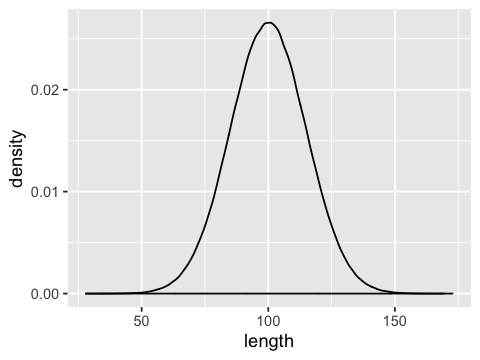

In [88]:
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3) # This just makes the figure display manageable 
mu       = 100
sigma    = 15
n_large  = 1000000
# Make new samples as data frames
large = data.frame(length=rnorm(n_large, mean=mu, sd=sigma))
# plot
ggplot(large, aes(length)) + geom_density(alpha = 0.2)

---
### **Applied:** Show your code & plots

---


The *central limit theorem* states that when independent random variables are added together, they sum to a normal distribution even if the original variables themselves are not normally distributed. For your homework test this assumption.

3. Using the *runif* function, run three experiments by simulating the outcomes of rolling a single, six-sided die. Show the distribution of each experiment. Show how the simulated means compare to the expected mean of a fair roll.
        	a) Exp 1: 10 independent throws
        	b) Exp 2: 1,000 independent throws
        	c) Exp 3: 10,000 independent throws


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


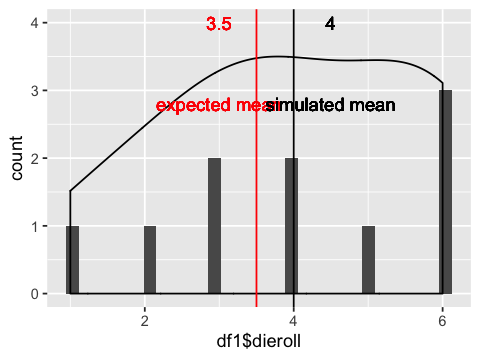

In [98]:
# -------------------------------
# Question 3
# -------------------------------
set.seed(123)
# a) Exp 1: 10 independent throws
die <- 1:6
expect_mean = sum(die)*1/6
dieroll = runif(10, 0, 6)
df1 <- data.frame(dieroll = ceiling(dieroll))
dr1 <- ceiling(dieroll)
ggplot(df1, aes(df1$dieroll)) + geom_histogram() + geom_density(alpha = 0.2,aes(y=2 * ..count..)) + 
geom_vline(xintercept = expect_mean,color = "red") + 
geom_vline(xintercept = mean(dr1)) +
geom_text(aes(x=3, label=expect_mean, y=4), colour="red") +
geom_text(aes(x=3, label="\nexpected mean", y=3), colour="red") +
geom_text(aes(x=4.5, label=round(mean(dr1),2), y=4), colour="black") +
geom_text(aes(x=4.5, label="\nsimulated mean", y=3), colour="black")

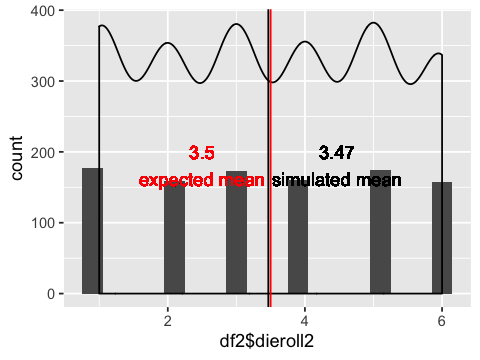

In [99]:
# b) Exp 2: 1,000 independent throws
dieroll2 <- runif(1000, 0, 6)
df2 <- data.frame(dieroll2 = ceiling(dieroll2))
dr2 <- ceiling(dieroll2)
ggplot(df2, aes(df2$dieroll2)) + geom_histogram(binwidth=0.3) + geom_density(alpha = 0.2,aes(y=2* ..count..)) + 
geom_vline(xintercept = expect_mean,color = "red") + 
geom_vline(xintercept = mean(dr2)) +
geom_text(aes(x=expect_mean-1, label=expect_mean, y=200), colour="red") +
geom_text(aes(x=expect_mean-1, label="\nexpected mean", y=180), colour="red") +
geom_text(aes(x=round(mean(dieroll2),2)+1, label=round(mean(dr2),2), y=200), colour="black") +
geom_text(aes(x=round(mean(dieroll2),2)+1, label="\nsimulated mean", y=180), colour="black")

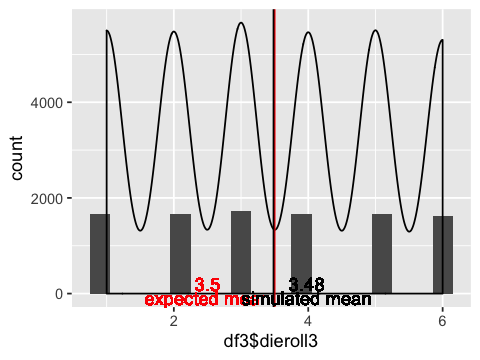

In [100]:
# c) Exp 3: 10,000 independent throws
dieroll3 = runif(10000, 0, 6)
df3 <- data.frame(dieroll3 = ceiling(dieroll3))
dr3 <- ceiling(dieroll3)
ggplot(df3, aes(df3$dieroll3)) + geom_histogram(binwidth=0.3) + geom_density(alpha = 0.2,aes(y=2* ..count..)) + 
geom_vline(xintercept = expect_mean,color = "red") + 
geom_vline(xintercept = mean(dr3)) +
geom_text(aes(x=expect_mean-1, label=expect_mean, y=200), colour="red") +
geom_text(aes(x=expect_mean-1, label="\nexpected mean", y=180), colour="red") +
geom_text(aes(x=round(mean(dieroll2),2)+1, label=round(mean(dr3),2), y=200), colour="black") +
geom_text(aes(x=round(mean(dieroll2),2)+1, label="\nsimulated mean", y=180), colour="black")

---
4. Instead of rolling one die, run a set of experiments reporting the outcomes of rolling multiple dice at the same time.
        	a) Exp 1: 10,000 throws, 1 die
        	b) Exp 2: 10,000 throws, 2 dice
        	c) Exp 3: 10,000 throws, 3 dice
        	d) Exp 4; 10,000 throws, 6 dice.

Show the distribution of results for each experiment. Which of these experiments produces a distribution most similar to a normal normal distribution? Justify your conclusion using Q-Q plots.

**Answer:** 

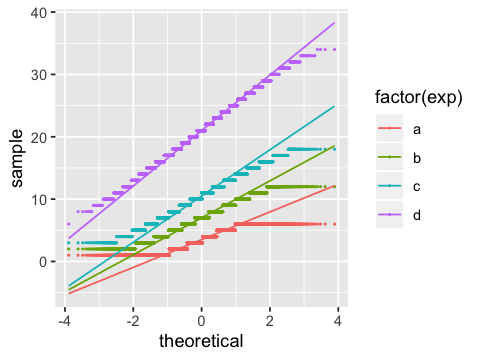

In [87]:
# -------------------------------
# Question 4
# -------------------------------
#a) Exp 1: 10,000 throws, 1 die


a = data.frame(length = ceiling(runif(10000, 0, 6)))
a$exp <- "a"
b = data.frame(length = ceiling(runif(10000, 0, 6))+ceiling(runif(10000, 0, 6)))
b$exp <- "b"
#c
dic_roll <- 0
for (i in 1:3)               #3 dices
   {  dic_roll=dic_roll+ceiling(runif(10000, 0, 6))}
c = data.frame(length = dic_roll)
c$exp <- "c"
#d
dic_roll <- 0
for (i in 1:6)               #6 dices
   {  dic_roll=dic_roll+ceiling(runif(10000, 0, 6))}
d = data.frame(length = dic_roll)
d$exp <- "d"
dat=rbind(a,b, c,d)
ggplot(dat, aes(sample = length, colour = factor(exp))) +
  stat_qq(size = 0.2) +
  stat_qq_line()

**DUE:** 5pm EST, Feb 11, 2020